<a href="https://colab.research.google.com/github/AbrilPaes/Machine-learning/blob/main/Practica_2_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-2-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Práctica 2</h1>

<h2>Redes CNN</h2>

Continuaremos con el trábado en el dataset Fashion MNIST.

<img align="center" width="50%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/Fashion-MNIST.jpg?raw=1"/>

[Más información sobre el dataset](https://keras.io/api/datasets/fashion_mnist/)

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

#-------- Dataset --------

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

#-------- Reescalamiento --------
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#-------- Codificación vectores de clase --------
print(f"y_train shape (valores de clase):\n{y_train.shape}")
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print(f"y_train shape (vectores de clase):\n{y_train.shape}")

#-------- Reshape para incluir el número de canales de la imágen --------
print(f"x_train shape (antes):\n{x_train.shape}")
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(f"x_train shape (después):\n{x_train.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
y_train shape (valores de clase):
(60000,)
y_train shape (vectores de clase):
(60000, 10)
x_train shape (antes):
(60000, 28, 28)
x_train shape (después):
(60000, 28, 28, 1)


In [ ]:
#graficar curvas de entrenamiento

import matplotlib.pyplot as plt

def graficar_curvas(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(history.history['loss'],label='Training')
    axs[0].plot(history.history['val_loss'],label='Validation')
    axs[0].set_title('Loss')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'],label='Training')
    axs[1].plot(history.history['val_accuracy'],label='Validation')
    axs[1].set_title('Accuracy')
    axs[1].legend()
    fig.show()

Recordemos el rendimiento de los algoritmos de Machine Learning clásico:

<img align="center" width="40%" src="https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/img/ML-Fashion-Mnist.png?raw=1"/>

El modelo básico trabajado en clase

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',
                padding="same", strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 50)                156850    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 157520 (615.31 KB)
Trainable params: 157520 (615.31 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Epoch 1/30
844/844 [==============================] - 29s 33ms/step - loss: 0.4805 - accuracy: 0.8349 - val_loss: 0.3316 - val_accuracy: 0.8792
Epoch 2/30
844/844 [==============================] - 22s 26ms/step - loss: 0.3130 - accuracy: 0.8906 - val_loss: 0.2951 - val_accuracy: 0.8933
Epoch 3/30
844/844 [==============================] - 20s 24ms/step - loss: 0.2723 - accuracy: 0.9015 - val_loss: 0.2743 - val_accuracy: 0.9032
Epoch 4/30
844/844 [==============================] - 22s 26ms/step - loss: 0.2459 - accuracy: 0.9114 - val_loss: 0.2806 - val_accuracy: 0.8963
Epoch 5/30
844/844 [==============================] - 18s 21ms/step - loss: 0.2256 - accuracy: 0.9180 - val_loss: 0.2545 - val_accuracy: 0.9080
Epoch 6/30
844/844 [==============================] - 20s 24ms/step - loss: 0.2099 - accuracy: 0.9230 - val_loss: 0.2580 - val_accuracy: 0.9082
Epoch 7/30
844/844 [==============================] - 19s 22ms/step - loss: 0.1930 - accuracy: 0.9299 - val_loss: 0.2474 - val_accuracy:

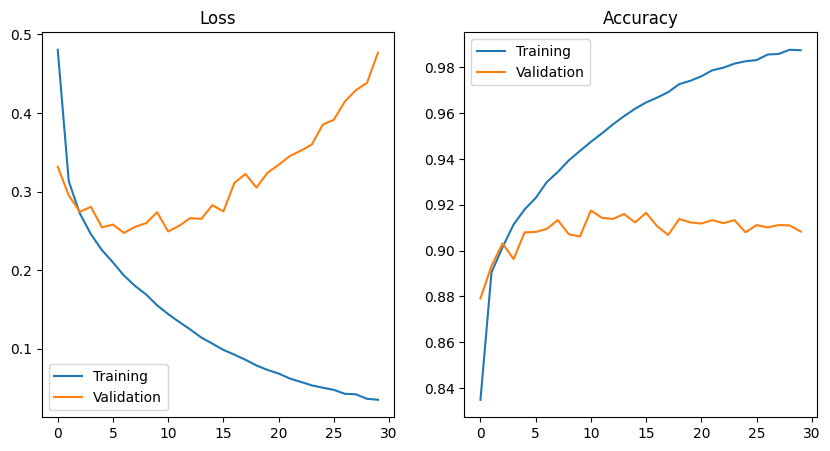

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.1, verbose=1)

graficar_curvas(history) # Graficar curvas de entrenamiento

⭕ Práctica

Usando el mismo dataset, implementa las siguientes redes CNN usando como punto de partida la red que hemos implementado, ya sea la versión como función o la *normal* (si te sientes insegura/o respecto a la implementación, no uses el enfoque de función):

* Una red CNN con dos capas convolucionales, en lugar de uno. La segunda capa tendrá las siguientes especificaciones:
 * Una capa convolucional 2D de 8 filtros, el resto de hiperparámetros serán los mismos.
 * Una capa de MaxPooling.
* La red CNN anterior, con las mismas dos capas convolucionales. Cambia la función de activación por `tanh`. ¿Cómo cambian los resultados?
* La red CNN anterior, con las mismas dos capas convolucionales. Cambia el hiperparámetro `padding='valid'`. ¿Qué observas?
* La red CNN anterior, con las mismas dos capas convolucionales. En la parte MLP de la red, agrega 3 capas densas. Usa el número de neuronas en estas capas de tu elección, así como la función de activación en ellas. Experimenta un poco.
* Una red CNN con una capa convolucional con 32 filtros, la parte MLP tendrá un capa oculta de 100 neuronas con activación `relu`. Para el optimizador una un [`SGD`](https://keras.io/api/optimizers/sgd/) con tasa de aprendizaje $0.01$.


Epoch 1/10
750/750 [==============================] - 54s 71ms/step - loss: 0.5264 - accuracy: 0.8121 - val_loss: 0.4357 - val_accuracy: 0.8459
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.3408 - accuracy: 0.8784 - val_loss: 0.3102 - val_accuracy: 0.8888
Epoch 3/10
750/750 [==============================] - 41s 54ms/step - loss: 0.2942 - accuracy: 0.8949 - val_loss: 0.2855 - val_accuracy: 0.8977
Epoch 4/10
750/750 [==============================] - 41s 54ms/step - loss: 0.2608 - accuracy: 0.9048 - val_loss: 0.2708 - val_accuracy: 0.9013
Epoch 5/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2363 - accuracy: 0.9142 - val_loss: 0.2637 - val_accuracy: 0.9033
Epoch 6/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2124 - accuracy: 0.9230 - val_loss: 0.2553 - val_accuracy: 0.9068
Epoch 7/10
750/750 [==============================] - 40s 54ms/step - loss: 0.1976 - accuracy: 0.9273 - val_loss: 0.2384 - val_accuracy:

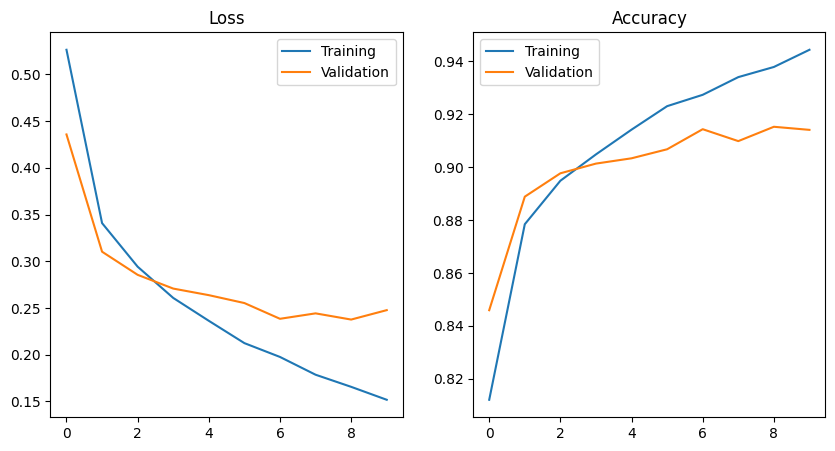

In [ ]:
#1 Una red CNN con dos capas convolucionales, en lugar de uno
# Crear el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=16, kernel_size=3, activation='relu',
                 padding='same', strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Segunda capa convolucional (8 filtros)
model.add(Conv2D(filters=8, kernel_size=3, activation='relu',
                 padding='same', strides=1))

# Capa-MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar características para las capas densas
model.add(Flatten())

# Capa densa
model.add(Dense(50, activation='relu'))

# Capa  salida
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Compilar modelo

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

graficar_curvas(history)

Epoch 1/10
750/750 [==============================] - 43s 56ms/step - loss: 0.4813 - accuracy: 0.8265 - val_loss: 0.3590 - val_accuracy: 0.8716
Epoch 2/10
750/750 [==============================] - 40s 54ms/step - loss: 0.3213 - accuracy: 0.8848 - val_loss: 0.3074 - val_accuracy: 0.8879
Epoch 3/10
750/750 [==============================] - 42s 55ms/step - loss: 0.2753 - accuracy: 0.9002 - val_loss: 0.2946 - val_accuracy: 0.8903
Epoch 4/10
750/750 [==============================] - 42s 56ms/step - loss: 0.2414 - accuracy: 0.9121 - val_loss: 0.2669 - val_accuracy: 0.9025
Epoch 5/10
750/750 [==============================] - 41s 55ms/step - loss: 0.2161 - accuracy: 0.9223 - val_loss: 0.2556 - val_accuracy: 0.9040
Epoch 6/10
750/750 [==============================] - 41s 55ms/step - loss: 0.1939 - accuracy: 0.9300 - val_loss: 0.2554 - val_accuracy: 0.9062
Epoch 7/10
750/750 [==============================] - 43s 57ms/step - loss: 0.1748 - accuracy: 0.9367 - val_loss: 0.2577 - val_accuracy:

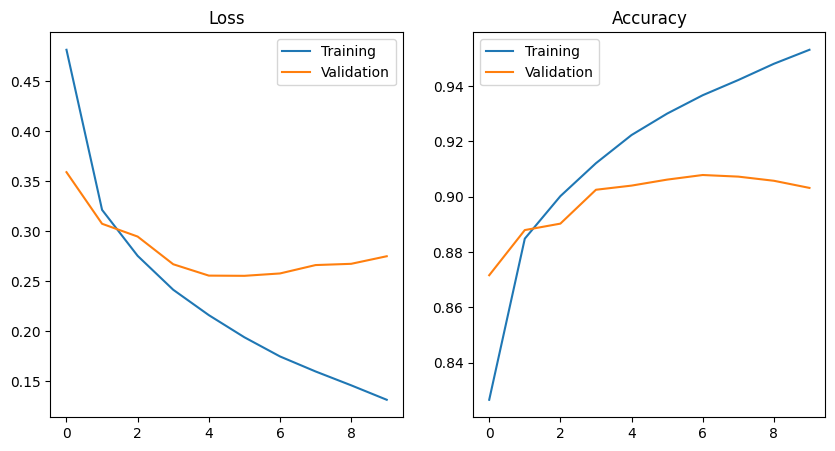

In [ ]:
#2 La red CNN anterior, con las mismas dos capas convolucionales. Cambia la función de activación por tanh.
#¿Cómo cambian los resultados?
#R= En la activación RELU tiene una mejor precisión y validación, los resultados con tanh tiene mayor pérdida


# Crear el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=16, kernel_size=3, activation='tanh',
                 padding='same', strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Segunda cnn con 8 filtros
model.add(Conv2D(filters=8, kernel_size=3, activation='tanh',
                 padding='same', strides=1))

# Capa-MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar características para las capas densas
model.add(Flatten())

# Capa densa
model.add(Dense(50, activation='tanh'))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

graficar_curvas(history)


Epoch 1/10
938/938 [==============================] - 28s 28ms/step - loss: 0.6070 - accuracy: 0.7834 - val_loss: 0.4556 - val_accuracy: 0.8354
Epoch 2/10
938/938 [==============================] - 25s 27ms/step - loss: 0.3959 - accuracy: 0.8554 - val_loss: 0.4031 - val_accuracy: 0.8532
Epoch 3/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3528 - accuracy: 0.8709 - val_loss: 0.3578 - val_accuracy: 0.8682
Epoch 4/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3299 - accuracy: 0.8792 - val_loss: 0.3389 - val_accuracy: 0.8769
Epoch 5/10
938/938 [==============================] - 24s 25ms/step - loss: 0.3119 - accuracy: 0.8859 - val_loss: 0.3376 - val_accuracy: 0.8776
Epoch 6/10
938/938 [==============================] - 25s 27ms/step - loss: 0.2979 - accuracy: 0.8903 - val_loss: 0.3221 - val_accuracy: 0.8830
Epoch 7/10
938/938 [==============================] - 25s 26ms/step - loss: 0.2868 - accuracy: 0.8946 - val_loss: 0.3109 - val_accuracy:

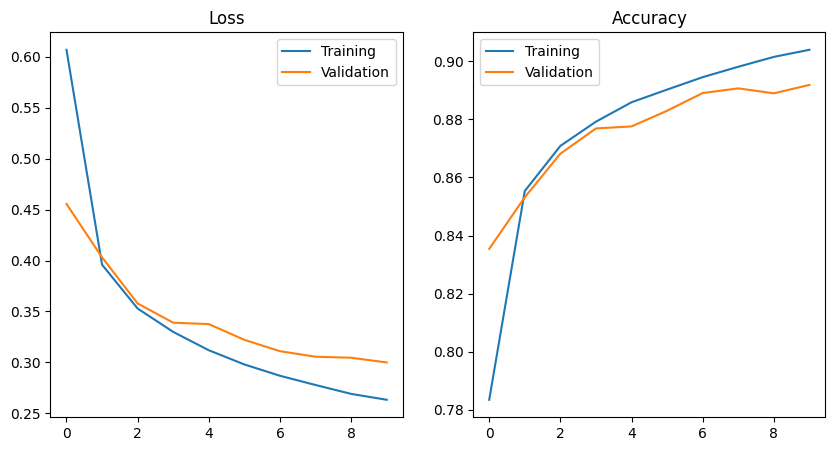

In [ ]:
#3 La red CNN anterior, con las mismas dos capas convolucionales. Cambia el hiperparámetro padding='valid'. ¿Qué observas?
#R= La precisión y la pérdida es un poco peor comparada con padding same


# Crear el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=16, kernel_size=3, activation='tanh',
                 padding='valid', strides=1,  # Cambiar a padding='valid'
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Capa de MaxPooling
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(Conv2D(filters=8, kernel_size=3, activation='tanh',
                 padding='valid'))  # Cambiar a padding='valid'

# Capa de MaxPooling
model.add(MaxPooling2D((2, 2)))

# Aplanar
model.add(Flatten())

# Capa densa
model.add(Dense(50, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

graficar_curvas(history)

Epoch 1/10
938/938 [==============================] - 25s 25ms/step - loss: 0.6584 - accuracy: 0.7566 - val_loss: 0.4847 - val_accuracy: 0.8259
Epoch 2/10
938/938 [==============================] - 24s 26ms/step - loss: 0.4328 - accuracy: 0.8419 - val_loss: 0.4226 - val_accuracy: 0.8457
Epoch 3/10
938/938 [==============================] - 22s 24ms/step - loss: 0.3758 - accuracy: 0.8638 - val_loss: 0.3782 - val_accuracy: 0.8620
Epoch 4/10
938/938 [==============================] - 25s 27ms/step - loss: 0.3457 - accuracy: 0.8734 - val_loss: 0.3804 - val_accuracy: 0.8632
Epoch 5/10
938/938 [==============================] - 23s 24ms/step - loss: 0.3242 - accuracy: 0.8799 - val_loss: 0.3447 - val_accuracy: 0.8724
Epoch 6/10
938/938 [==============================] - 22s 23ms/step - loss: 0.3064 - accuracy: 0.8877 - val_loss: 0.3438 - val_accuracy: 0.8741
Epoch 7/10
938/938 [==============================] - 23s 24ms/step - loss: 0.2947 - accuracy: 0.8913 - val_loss: 0.3287 - val_accuracy:

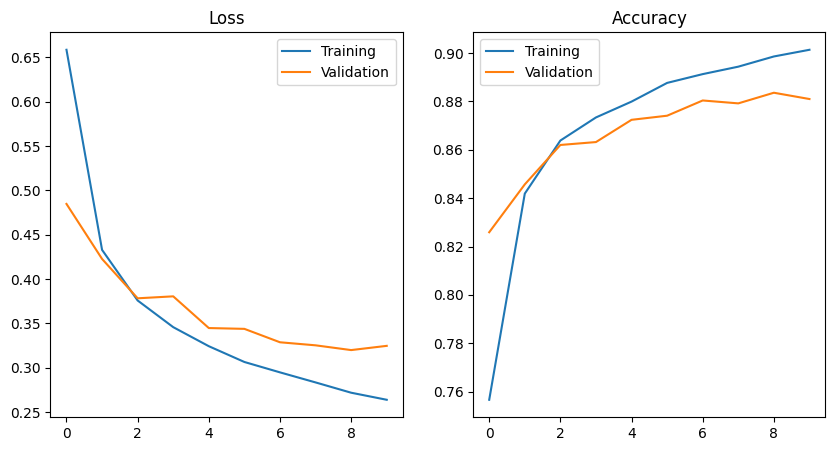

In [ ]:
#4 La red CNN anterior, con las mismas dos capas convolucionales. En la parte MLP de la red, agrega 3 capas densas.
#Usa el número de neuronas en estas capas de tu elección, así como la función de activación en ellas.

# Crear el modelo
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(filters=16, kernel_size=3, activation='relu',
                 padding='valid', strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Capa de MaxPooling
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(Conv2D(filters=8, kernel_size=3, activation='relu',
                 padding='valid'))

# Capa de MaxPooling
model.add(MaxPooling2D((2, 2)))

# Aplanar
model.add(Flatten())

# Capas densas adicionales
model.add(Dense(64, activation='relu'))  # Capa densa con 128 neuronas
model.add(Dense(64, activation='relu'))   #  con 64 neuronas
model.add(Dense(32, activation='relu'))   #con 32 neuronas

# Capa salida
model.add(Dense(10, activation='softmax'))  # Capa salida con 10 neuronas para las 10 clases

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

graficar_curvas(history)#graficar

Epoch 1/10
938/938 [==============================] - 35s 37ms/step - loss: 0.8254 - accuracy: 0.7230 - val_loss: 0.5642 - val_accuracy: 0.7906
Epoch 2/10
938/938 [==============================] - 34s 36ms/step - loss: 0.5133 - accuracy: 0.8160 - val_loss: 0.7400 - val_accuracy: 0.7237
Epoch 3/10
938/938 [==============================] - 34s 37ms/step - loss: 0.4673 - accuracy: 0.8340 - val_loss: 0.4660 - val_accuracy: 0.8357
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.4321 - accuracy: 0.8483 - val_loss: 0.4918 - val_accuracy: 0.8184
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.4087 - accuracy: 0.8559 - val_loss: 0.4563 - val_accuracy: 0.8360
Epoch 6/10
938/938 [==============================] - 33s 35ms/step - loss: 0.3894 - accuracy: 0.8637 - val_loss: 0.4625 - val_accuracy: 0.8328
Epoch 7/10
938/938 [==============================] - 33s 35ms/step - loss: 0.3731 - accuracy: 0.8680 - val_loss: 0.4053 - val_accuracy:

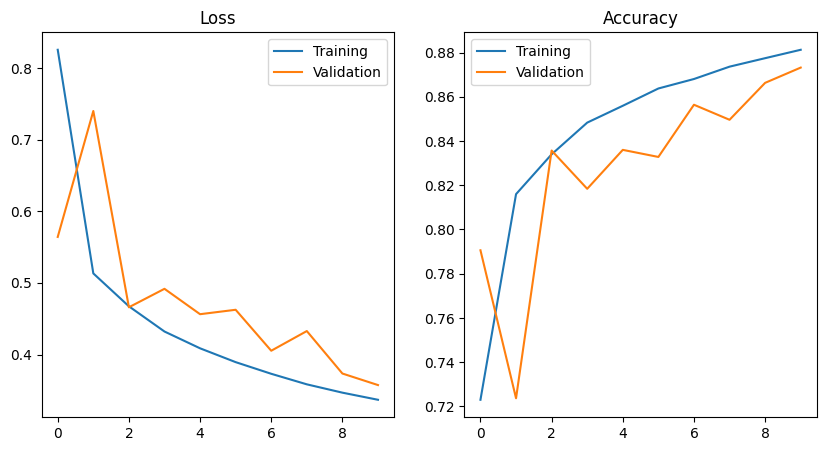

In [ ]:
#5Una red CNN con una capa convolucional con 32 filtros, la parte MLP tendrá un capa oculta de 100 neuronas con activación relu.
#Para el optimizador una un SGD con tasa de aprendizaje  0.01 .

from keras.optimizers import SGD

# Crear el modelo
model = Sequential()

# Capa convolucional con 32 filtros
model.add(Conv2D(filters=32, kernel_size=3, activation='relu',
                 padding='same', strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))

# Capa de MaxPooling
model.add(MaxPooling2D((2, 2)))

# Aplanar
model.add(Flatten())

# Capa oculta con 100 neuronas y activación relu
model.add(Dense(100, activation='relu'))

# Capa de salida
model.add(Dense(10, activation='softmax'))  # salida con 10 neuronas para las 10 clases


#Optimizador SGD y tasa de aprendizaje 0.01
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))#Entrenamiento

graficar_curvas(history)

* Implementa una red MLP para este mismo problema. Prueba al menos 3 arquitecturas diferentes, ¿cuál fue la mejor opción? ¿cómo se compara con una CNN?
 * No olvides el conjunto de validación.
 * Usa el callback de `EarlyStopping`.
 * Cuida no re-entrenar modelos.

Para este último punto, usa el siguiente código para preparar el dataset:

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Shapes al cargar el dataset:")
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print("\nShapes al preprocesar el dataset:")
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

Dudas: mauricio.toledo@unison.mx

Respecto a las dimensiones de salida de una capa convolucional: [wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#Convolutional_layer), [stackoverflow](https://stackoverflow.com/questions/53580088/calculate-the-output-size-in-convolution-layer).